## Введение 


### Цели проекта:
Проанализировать базу данных сервиса для чтения книг

### Задачи:
1. Опишите цели исследования;
2. Исследуйте таблицы — выведите первые строки;
3. Сделайте по одному SQL-запросу для решения каждого задания;
            Посчитайте, сколько книг вышло после 1 января 2000 года;
            Для каждой книги посчитайте количество обзоров и среднюю оценку;
            Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
            Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
            Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.
4. Выведите результаты каждого запроса в тетрадке;
5. Опишите выводы по каждой из решённых задач.



### Содержание датасета

        Таблица books
            Содержит данные о книгах:
            book_id — идентификатор книги;
            author_id — идентификатор автора;
            title — название книги;
            num_pages — количество страниц;
            publication_date — дата публикации книги;
            publisher_id — идентификатор издателя.
        Таблица authors
            Содержит данные об авторах:
            author_id — идентификатор автора;
            author — имя автора.
        Таблица publishers
            Содержит данные об издательствах:
            publisher_id — идентификатор издательства;
            publisher — название издательства;
        Таблица ratings
            Содержит данные о пользовательских оценках книг:
            rating_id — идентификатор оценки;
            book_id — идентификатор книги;
            username — имя пользователя, оставившего оценку;
            rating — оценка книги.
        Таблица reviews
            Содержит данные о пользовательских обзорах:
            review_id — идентификатор обзора;
            book_id — идентификатор книги;
            username — имя автора обзора;
            text — текст обзора.



In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
 'pwd': 'Sdf4$2;d-d30pp', # пароль
 'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
 'port': 6432, # порт подключения
 'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

## Исследуйте таблицы — выведите первые строки

In [2]:

query = ''' SELECT 
                *
            FROM books
            LIMIT 10'''
books = pd.io.sql.read_sql(query, con = engine)
books.head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [3]:
query = ''' SELECT 
                *
            FROM authors
            LIMIT 10'''
authors = pd.io.sql.read_sql(query, con = engine)
authors.head()

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [4]:

query = ''' SELECT 
                *
            FROM publishers
            LIMIT 10'''
publishers = pd.io.sql.read_sql(query, con = engine)
publishers.head()

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [5]:
query = ''' SELECT 
                *
            FROM ratings
            LIMIT 10'''
ratings = pd.io.sql.read_sql(query, con = engine)
ratings.head()

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [6]:
query = ''' SELECT 
                *
            FROM reviews
            LIMIT 10'''
reviews = pd.io.sql.read_sql(query, con = engine)
reviews.head()

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


с таблицами ознакомились

## Сделайте по одному SQL-запросу для решения каждого задания;

### Посчитайте, сколько книг вышло после 1 января 2000 года;          

In [7]:
query = '''SELECT 
            COUNT(book_id) AS cnt
            FROM
            books
            WHERE 
            publication_date::date > '2000-01-01';
        '''
            
count_books1 = pd.io.sql.read_sql(query, con = engine)
count_books1

,cnt
0,819


819 книг вышло после 1 января 2000

### Для каждой книги посчитайте количество обзоров и среднюю оценку;            

In [9]:
query = '''
             WITH avg_ratings AS (SELECT book_id, AVG(rating) AS avg_rating
                                 FROM ratings 
                                 GROUP BY book_id),
                  reviews_count AS (SELECT b.book_id, COUNT(rev.review_id) AS review_count
                                    FROM books AS b 
                                    LEFT JOIN reviews AS rev ON b.book_id = rev.book_id
                                    GROUP BY b.book_id)
            SELECT b.book_id, b.title, rc.review_count, ROUND(ar.avg_rating, 2) AS avg_rating 
            FROM reviews_count AS rc
            INNER JOIN books AS b ON b.book_id=rc.book_id
            LEFT JOIN avg_ratings AS ar ON ar.book_id=b.book_id 
            ORDER BY rc.review_count DESC
         '''
reviews_and_ratings = pd.io.sql.read_sql(query, con = engine)
reviews_and_ratings.head(50)

,book_id,title,review_count,avg_rating
0,948,Twilight (Twilight #1),7,3.66
1,695,The Curious Incident of the Dog in the Night-Time,6,4.08
2,299,Harry Potter and the Chamber of Secrets (Harry...,6,4.29
3,696,The Da Vinci Code (Robert Langdon #2),6,3.83
4,734,The Glass Castle,6,4.21
5,207,Eat Pray Love,6,3.40
6,673,The Catcher in the Rye,6,3.83
7,750,The Hobbit or There and Back Again,6,4.13
8,497,Outlander (Outlander #1),6,4.13
9,854,The Road,6,3.77


In [11]:
query = '''SELECT 
                ratings.book_id AS book_id,
                books.title as title,
                AVG(ratings.rating) as average_rating,
                COUNT(reviews.review_id) as amount_reviews
            FROM 
                ratings
                INNER JOIN reviews ON reviews.book_id = ratings.book_id
                INNER JOIN books ON books.book_id = ratings.book_id
                
            GROUP BY 
                ratings.book_id,
                books.title
            ORDER BY
                average_rating DESC;'''
reviews_and_ratings = pd.io.sql.read_sql(query, con = engine)
reviews_and_ratings.head()

,book_id,title,average_rating,amount_reviews
0,901,The Walking Dead Book One (The Walking Dead #...,5.0,4
1,518,Pop Goes the Weasel (Alex Cross #5),5.0,4
2,444,Moneyball: The Art of Winning an Unfair Game,5.0,9
3,913,The Woman in Black,5.0,4
4,169,Crucial Conversations: Tools for Talking When ...,5.0,4


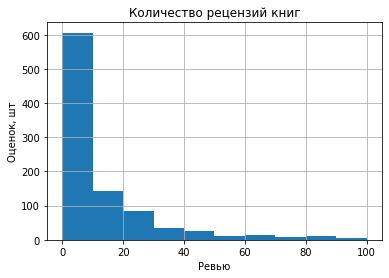

In [12]:
reviews_and_ratings['amount_reviews'].hist(bins=10, range=(0,100))
plt.ylabel('Оценок, шт')
plt.xlabel('Ревью')
plt.title('Количество рецензий книг')
plt.show()

до 20 рецензий пишут на книги. но максимально до 10. далее резкое уменьшение числа рецензий

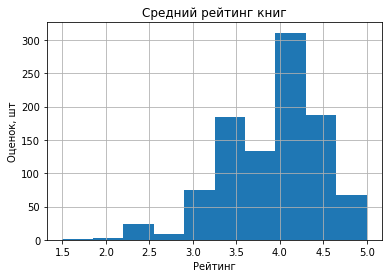

In [13]:
reviews_and_ratings['average_rating'].hist()
plt.ylabel('Оценок, шт')
plt.xlabel('Рейтинг')
plt.title('Средний рейтинг книг')
plt.show()

Средний рейтинг книг в районе 4 до 4,5 их оценило около 300 оценок. мало оценок ниже 3.25 и практически нету после 2,5 менее 50 оценок

### Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;          

In [14]:
query = '''SELECT 
                publishers.publisher as publisher,
                COUNT(books.book_id) as books_cnt
            FROM 
                books
            LEFT JOIN publishers 
                            ON
                publishers.publisher_id = books.publisher_id
            WHERE 
                books.num_pages > 50
            GROUP BY
                publishers.publisher
            ORDER BY
                books_cnt DESC
            LIMIT 1;'''
num_pages_more_than_50 = pd.io.sql.read_sql(query, con = engine)
num_pages_more_than_50.head()

,publisher,books_cnt
0,Penguin Books,42


Penguin Books выпустило книги более 50 страниц

### Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;            

In [15]:
query = '''SELECT 
                books.author_id AS author_id,
                authors.author AS authors,
                COUNT (ratings.rating_id) AS cnt,
                AVG (ratings.rating) AS avg
            FROM
                books
                INNER JOIN authors ON authors.author_id = books.author_id
                INNER JOIN ratings ON ratings.book_id = books.book_id
            GROUP BY 
                authors.author_id,
                books.author_id
            HAVING
                COUNT(ratings.rating_id) > 50
            ORDER BY 
                avg DESC
            LIMIT 1;'''
authors_with_high_rating = pd.io.sql.read_sql(query, con = engine)
authors_with_high_rating.head()

,author_id,authors,cnt,avg
0,236,J.K. Rowling/Mary GrandPré,312,4.288462


автор с самой высокой оценкой книг J.K. Rowling/Mary GrandPré

### Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

In [17]:
query = '''SELECT 
                
                AVG (Sub_count.cnt_text) as avg_cnt_text
                
            FROM
                (SELECT
                    count(distinct reviews.text) as cnt_text
                 FROM
                     (SELECT
                         username,
                         COUNT(ratings.book_id) as cnt_books
                      FROM
                      ratings
                 GROUP BY 
                     username
                 HAVING
                     COUNT(ratings.book_id) > 50) AS Sub
            INNER JOIN reviews ON reviews.username = Sub.username
            GROUP BY 
                Sub.username) as Sub_count'''
                
avg = pd.io.sql.read_sql(query, con = engine)
avg.head()

,avg_cnt_text
0,24.333333


24.3 обзора в среднем 

***Вывод***

            Посчитайте, сколько книг вышло после 1 января 2000 года; - 819 книг вышло после 1 января 2000
            
            
            Для каждой книги посчитайте количество обзоров и среднюю оценку;
                        до 20 рецензий пишут на книги. но максимально до 10. далее резкое уменьшение числа рецензий
                        Средний рейтинг книг в районе 4 до 4,5 их оценило около 300 оценок. мало оценок ниже 3.25 и практически нету после 2,5 менее 50 оценок
            
            
            Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры; - Penguin Books выпустило книги более 50 страниц
            
            Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками; - автор с самой высокой оценкой книг J.K. Rowling/Mary GrandPré 
            
            Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок. - 24.3 обзора в среднем 